In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

In [2]:
df_cog_functions = pd.read_csv("../hmmsearch_outputs_5kb/eggnog/cog_functions.tsv", sep="\t")
df_cog_functions.head()

,COG_category,Code,Category_description
0,J,FCCCFC,"Translation, ribosomal structure and biogenesis"
1,A,FCDCFC,RNA processing and modification
2,K,FCDCEC,Transcription
3,L,FCDCDC,"Replication, recombination and repair"
4,B,FCDCCC,Chromatin structure and dynamics


In [3]:
df = pd.read_csv("../hmmsearch_outputs_5kb/eggnog/cog_mapping.tsv", sep="\t")
df = df.drop_duplicates(subset=["Protein", "Cat"])
df["Cat"] = df["Cat"].apply(lambda x: x.split())

df = df.explode("Cat")
df.head()

,Protein,COG,Cat
0,2088090014|GPIPI_16944593_1,COG0507,L
1,2088090014|GPIPI_16944593_2,COG0446,I
2,2088090014|GPIPI_16944593_2,COG1902,C
3,2088090014|GPIPI_16944593_3,COG1172,G
4,2088090014|GPIPI_16944593_4,COG4644,X


In [4]:
df["Plasmid"] = df["Protein"].apply(
    lambda x: "_".join(x.split("_")[0:-1]) if "IMGPR" not in x else x.split("|")[0]
)
df["taxon_oid"] = df["Plasmid"].apply(
    lambda x: (
        x
        if any(i for i in ["PLSDB", "Refsoil"] if i in x)
        else x.split("_")[2]
        if "IMGPR" in x
        else x.split("|")[0]
    )
)

df.head()

,Protein,COG,Cat,Plasmid,taxon_oid
0,2088090014|GPIPI_16944593_1,COG0507,L,2088090014|GPIPI_16944593,2088090014
1,2088090014|GPIPI_16944593_2,COG0446,I,2088090014|GPIPI_16944593,2088090014
2,2088090014|GPIPI_16944593_2,COG1902,C,2088090014|GPIPI_16944593,2088090014
3,2088090014|GPIPI_16944593_3,COG1172,G,2088090014|GPIPI_16944593,2088090014
4,2088090014|GPIPI_16944593_4,COG4644,X,2088090014|GPIPI_16944593,2088090014


In [6]:
ptus = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)

ptus_mapping = {}

for idx in ptus.index:
    for plasmid in ptus.loc[idx, 2].split(","):
        ptus_mapping[plasmid] = idx

envs = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")
envs["taxon_oid"] = envs["taxon_oid"].astype(str)
envs.head()

,taxon_oid,Ecosystem Subtype,Latitude,Longitude,Origin,Isolation Country,Ecosystem Subtype Custom,Plasmid Count,soil_class,bdod (cg/cm³),...,silt (g/kg),soc (dg/kg),geometry,index_right,ECO_NAME,WWF_REALM,RealmMHT,WWF_REALM2,WWF_MHTNUM,WWF_MHTNAM
0,3300049023,Grasslands,38.53,-121.78,Meta,USA,Grasslands,36,Luvisols,152.0,...,562.0,335.0,POINT (-121.78 38.53),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"
1,3300012840,Grasslands,43.07,-89.40,Meta,USA,Grasslands,21,Luvisols,NaN,...,NaN,NaN,POINT (-89.4 43.07),187.0,Prairie-Forest Border,NaN,NA4,Nearctic,4.0,Temperate Broadleaf and Mixed Forests
2,3300039503,Unclassified,63.88,-149.23,Meta,USA,Unclassified,3,Cambisols,60.0,...,496.0,2409.0,POINT (-149.23 63.88),734.0,Alaska Range,NaN,NA6,Nearctic,6.0,Boreal Forests/Taiga
3,3300042005,Rhizosphere,41.20,-97.94,Meta,USA,Rhizosphere,6,Kastanozems,135.0,...,242.0,301.0,POINT (-97.94 41.2),747.0,Central Mixed-Grass Prairie,NaN,NA8,Nearctic,8.0,"Temperate Grasslands, Savannas and Shrublands"
4,3300049265,Agricultural land,38.55,-121.87,Meta,USA,Agricultural land,1,Vertisols,158.0,...,508.0,274.0,POINT (-121.87 38.55),761.0,Great Central Valley,NaN,NA12,Nearctic,12.0,"Mediterranean Forests, Woodlands and Scrub"


In [7]:
df = df.join(
    envs.set_index("taxon_oid")[
        ["Ecosystem Subtype", "Ecosystem Subtype Custom", "Origin"]
    ],
    on="taxon_oid",
)

df["PTU"] = df["Plasmid"].apply(lambda x: ptus_mapping.get(x, np.nan))

df.head()

,Protein,COG,Cat,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,Origin,PTU
0,2088090014|GPIPI_16944593_1,COG0507,L,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264
1,2088090014|GPIPI_16944593_2,COG0446,I,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264
2,2088090014|GPIPI_16944593_2,COG1902,C,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264
3,2088090014|GPIPI_16944593_3,COG1172,G,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264
4,2088090014|GPIPI_16944593_4,COG4644,X,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264


In [8]:
df = df.join(df_cog_functions.drop("Code", axis=1).set_index("COG_category"), on="Cat")
df.head()

,Protein,COG,Cat,Plasmid,taxon_oid,Ecosystem Subtype,Ecosystem Subtype Custom,Origin,PTU,Category_description
0,2088090014|GPIPI_16944593_1,COG0507,L,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264,"Replication, recombination and repair"
1,2088090014|GPIPI_16944593_2,COG0446,I,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264,Lipid transport and metabolism
2,2088090014|GPIPI_16944593_2,COG1902,C,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264,Energy production and conversion
3,2088090014|GPIPI_16944593_3,COG1172,G,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264,Carbohydrate transport and metabolism
4,2088090014|GPIPI_16944593_4,COG4644,X,2088090014|GPIPI_16944593,2088090014,Grasslands,Grasslands,Meta,PTU-57264,"Mobilome: prophages, transposons"


In [9]:
group = df.groupby(["Origin", "Category_description"])["Plasmid"].nunique().unstack().T
group.reset_index(inplace=True)
group.head()

Origin,Category_description,Isolate,Meta
0,Amino acid transport and metabolism,4615,17388
1,Carbohydrate transport and metabolism,4461,16806
2,"Cell cycle control, cell division, chromosome ...",5291,31335
3,Cell motility,4428,19706
4,Cell wall/membrane/envelope biogenesis,5595,25304


In [16]:
total_annotated_genes = group[['Isolate','Meta']].sum().sum()
total_annotated_genes

651055

In [15]:
meta_rank = group.sort_values("Meta", ascending=False)[['Category_description', 'Meta']].reset_index(drop=True)
meta_rank["Meta_proportion"] = meta_rank["Meta"] / total_annotated_genes
meta_rank['Rank_meta'] = pd.Series(range(1, meta_rank.shape[0]+1))
meta_rank

Origin,Category_description,Meta,Meta_proportion,Rank_meta
0,"Replication, recombination and repair",58223,0.089429,1
1,"Intracellular trafficking, secretion, and vesi...",47856,0.073505,2
2,Transcription,46765,0.071830,3
3,"Mobilome: prophages, transposons",43802,0.067278,4
4,General function prediction only,39272,0.060321,5
5,"Cell cycle control, cell division, chromosome ...",31335,0.048130,6
6,Signal transduction mechanisms,27177,0.041743,7
7,Defense mechanisms,26583,0.040831,8
8,Cell wall/membrane/envelope biogenesis,25304,0.038866,9
9,"Posttranslational modification, protein turnov...",22059,0.033882,10


In [18]:
isolate_rank = group.sort_values("Isolate", ascending=False)[['Category_description', 'Isolate']].reset_index(drop=True)
isolate_rank["isolate_proportion"] = isolate_rank["Isolate"] / total_annotated_genes
isolate_rank['Rank_isolate'] = pd.Series(range(1, isolate_rank.shape[0]+1))
isolate_rank

Origin,Category_description,Isolate,isolate_proportion,Rank_isolate
0,Transcription,6767,0.010394,1
1,"Replication, recombination and repair",6401,0.009832,2
2,"Mobilome: prophages, transposons",6260,0.009615,3
3,General function prediction only,6192,0.009511,4
4,Cell wall/membrane/envelope biogenesis,5595,0.008594,5
5,Defense mechanisms,5431,0.008342,6
6,"Cell cycle control, cell division, chromosome ...",5291,0.008127,7
7,Signal transduction mechanisms,5230,0.008033,8
8,"Posttranslational modification, protein turnov...",4891,0.007512,9
9,Function unknown,4728,0.007262,10


In [11]:
rank_df = meta_rank.set_index('Category_description').join(isolate_rank.set_index("Category_description"))
rank_df.head()

Origin,Meta,Rank_meta,Isolate,Rank_isolate
Category_description,,,,
"Replication, recombination and repair",58223,1,6394,2
"Intracellular trafficking, secretion, and vesicular transport",47856,2,4578,13
Transcription,46765,3,6760,1
"Mobilome: prophages, transposons",43802,4,6253,3
General function prediction only,39272,5,6185,4


In [12]:
melted_rank_df = rank_df.reset_index().melt(id_vars="Category_description", value_vars=["Rank_meta", "Rank_isolate"], var_name="Origin", value_name="Rank")

melted_rank_df.join(rank_df[["Meta", "Isolate"]], on="Category_description").join(df.drop_duplicates('Category_description').set_index('Category_description')['Cat'], on="Category_description").to_csv('cog_categories.tsv', sep="\t", index=False)

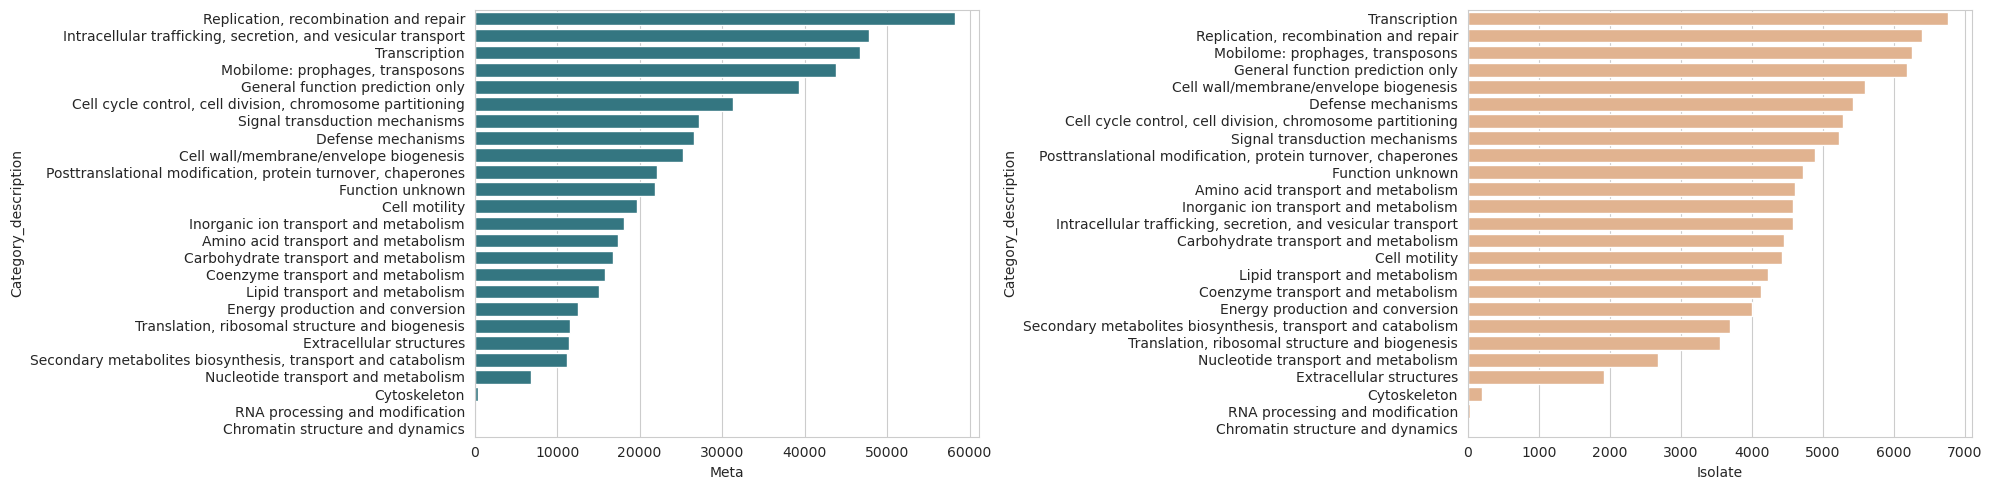

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
sns.barplot(
    data=group.sort_values("Meta", ascending=False),
    x="Meta",
    y="Category_description",
    ax=axes[0],
    color="#277F8E",
)
sns.barplot(
    data=group.sort_values("Isolate", ascending=False),
    x="Isolate",
    y="Category_description",
    ax=axes[1],
    color="#EEB182",
)
axes[0].set_ylabel = ""
axes[0].set_xlabel = "Number of proteins"
axes[1].set_ylabel = ""

plt.tight_layout()

In [14]:
n_meta_plasmids = 90200
n_isolate_plasmids = 8081
group["meta_proportion"] = group["Meta"] / n_meta_plasmids
group["isolate_proportion"] = group["Isolate"] / n_isolate_plasmids
group

Origin,Category_description,Isolate,Meta,meta_proportion,isolate_proportion
0,Amino acid transport and metabolism,4609,17388,0.192772,0.570350
1,Carbohydrate transport and metabolism,4456,16806,0.186319,0.551417
2,"Cell cycle control, cell division, chromosome ...",5284,31335,0.347395,0.653879
3,Cell motility,4421,19706,0.218470,0.547086
4,Cell wall/membrane/envelope biogenesis,5588,25304,0.280532,0.691499
5,Chromatin structure and dynamics,9,54,0.000599,0.001114
6,Coenzyme transport and metabolism,4123,15819,0.175377,0.510209
7,Cytoskeleton,208,368,0.004080,0.025739
8,Defense mechanisms,5424,26583,0.294712,0.671204
9,Energy production and conversion,4001,12512,0.138714,0.495112


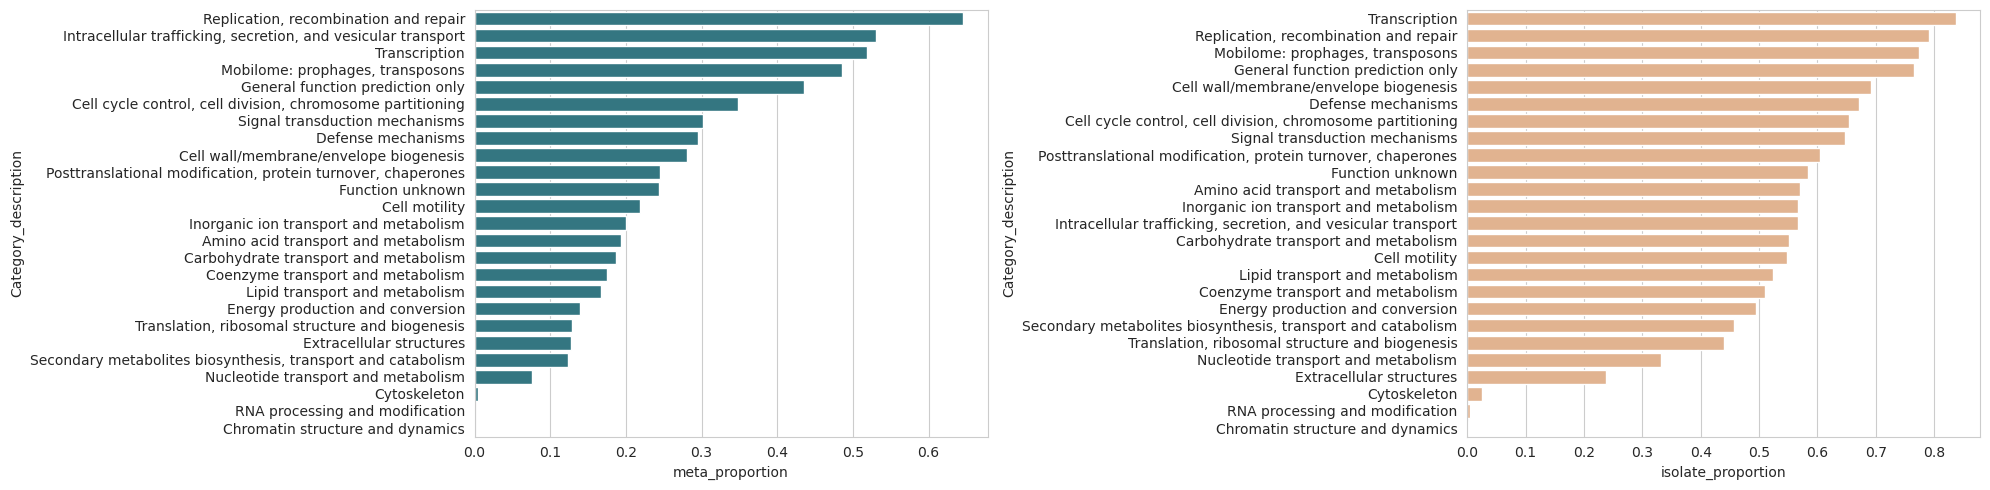

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
sns.barplot(
    data=group.sort_values("meta_proportion", ascending=False),
    x="meta_proportion",
    y="Category_description",
    ax=axes[0],
    color="#277F8E",
)
sns.barplot(
    data=group.sort_values("isolate_proportion", ascending=False),
    x="isolate_proportion",
    y="Category_description",
    ax=axes[1],
    color="#EEB182",
)
axes[0].set_ylabel = ""
axes[0].set_xlabel = "Number of proteins"
axes[1].set_ylabel = ""

plt.tight_layout()

Fisher exact test

In [16]:
from scipy import stats

n_meta_plasmids = 90200
n_isolate_plasmids = 8081

test = group[['Category_description', 'Meta', 'Isolate']].set_index('Category_description')
test["Meta_no"] = n_meta_plasmids - test["Meta"] 
test["Isolate_no"] = n_isolate_plasmids - test["Isolate"]
test

Origin,Meta,Isolate,Meta_no,Isolate_no
Category_description,,,,
Amino acid transport and metabolism,17388,4609,72812,3472
Carbohydrate transport and metabolism,16806,4456,73394,3625
"Cell cycle control, cell division, chromosome partitioning",31335,5284,58865,2797
Cell motility,19706,4421,70494,3660
Cell wall/membrane/envelope biogenesis,25304,5588,64896,2493
Chromatin structure and dynamics,54,9,90146,8072
Coenzyme transport and metabolism,15819,4123,74381,3958
Cytoskeleton,368,208,89832,7873
Defense mechanisms,26583,5424,63617,2657


In [17]:
def calc_odds_ratio(element_type):
    meta_with_element = int(test.loc[element_type, "Meta"])
    isolate_with_element = int(test.loc[element_type, "Isolate"])
    meta_without_element = int(test.loc[element_type, "Meta_no"])
    isolate_without_element = int(test.loc[element_type, "Isolate_no"])

    # without pseudo counts for fisher exact
    table_fisher = np.array(
        [
            [meta_with_element, isolate_with_element],
            [
                meta_without_element,
                isolate_without_element,
            ],
        ]
    )

    fisher_exact_p = stats.fisher_exact(table_fisher).pvalue
    res = stats.contingency.odds_ratio(table_fisher)

    return (
        float(table_fisher[0][0]),
        float(table_fisher[0][1]),
        np.log(res.statistic),
        fisher_exact_p,
    )

In [18]:
results = {}
for i in set(test.index):
    results[i] = calc_odds_ratio(i)

results

{'Cell cycle control, cell division, chromosome partitioning': (31335.0,
  5284.0,
  -1.26663321820968,
  0.0),
 'Replication, recombination and repair': (58223.0,
  6394.0,
  -0.7331380433827664,
  5.1953493212755887e-166),
 'Defense mechanisms': (26583.0, 5424.0, -1.5862263635903162, 0.0),
 'Cell wall/membrane/envelope biogenesis': (25304.0,
  5588.0,
  -1.7489375182370075,
  0.0),
 'Lipid transport and metabolism': (15078.0, 4230.0, -1.6997214210961302, 0.0),
 'Mobilome: prophages, transposons': (43802.0,
  6253.0,
  -1.2874037173057553,
  0.0),
 'Energy production and conversion': (12512.0,
  4001.0,
  -1.8064321116344648,
  0.0),
 'Secondary metabolites biosynthesis, transport and catabolism': (11154.0,
  3689.0,
  -1.7837742420540532,
  0.0),
 'Signal transduction mechanisms': (27177.0, 5223.0, -1.444062022141827, 0.0),
 'Cytoskeleton': (368.0, 208.0, -1.8639191600583866, 1.182274527756987e-78),
 'Chromatin structure and dynamics': (54.0,
  9.0,
  -0.6212616449088547,
  0.1014863

In [19]:
results_df = pd.DataFrame(results).T
results_df.columns = ["Meta", "Isolate", "log_odds", "p"]
results_df['padj'] = stats.false_discovery_control(results_df['p'])
results_df

,Meta,Isolate,log_odds,p,padj
"Cell cycle control, cell division, chromosome partitioning",31335.0,5284.0,-1.266633,0.000000e+00,0.000000e+00
"Replication, recombination and repair",58223.0,6394.0,-0.733138,5.195349e-166,6.494187e-166
Defense mechanisms,26583.0,5424.0,-1.586226,0.000000e+00,0.000000e+00
Cell wall/membrane/envelope biogenesis,25304.0,5588.0,-1.748938,0.000000e+00,0.000000e+00
Lipid transport and metabolism,15078.0,4230.0,-1.699721,0.000000e+00,0.000000e+00
"Mobilome: prophages, transposons",43802.0,6253.0,-1.287404,0.000000e+00,0.000000e+00
Energy production and conversion,12512.0,4001.0,-1.806432,0.000000e+00,0.000000e+00
"Secondary metabolites biosynthesis, transport and catabolism",11154.0,3689.0,-1.783774,0.000000e+00,0.000000e+00
Signal transduction mechanisms,27177.0,5223.0,-1.444062,0.000000e+00,0.000000e+00
Cytoskeleton,368.0,208.0,-1.863919,1.182275e-78,1.343494e-78


In [21]:
results_df[results_df['padj'] >= 0.05]

,Meta,Isolate,log_odds,p,padj
Chromatin structure and dynamics,54.0,9.0,-0.621262,0.101486,0.101486
